In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#加载数据集
iris=sns.load_dataset("iris")
iris.head()
# & Sepal.Length（花萼长度），单位是cm;
# & Sepal.Width（花萼宽度），单位是cm;
# & Petal.Length（花瓣长度），单位是cm;
# & Petal.Width（花瓣宽度），单位是cm;
# Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#sigmoid函数
def sigmoid(X):
    return 1/(1+np.exp(-X))

# 预测
def predict(X_train,w):
    return sigmoid( X_train * w )

# 获取准确率
def predict_acc(X_train,X_test,y_train,y_test,w):
    
    if(y_test.shape[1]==3):#多分类问题时
        train_pred = np.argmax(predict(X_train,w), axis=1)
        test_pred = np.argmax(predict(X_test,w), axis=1)
        y_train = np.argmax(y_train, axis=1)
        y_test = np.argmax(y_test, axis=1)
    else:
        train_pred = np.round(predict(X_train,w))
        test_pred = np.round(predict(X_test,w))
        
    acc_train = metrics.accuracy_score(y_train, train_pred)
    acc_test = metrics.accuracy_score(y_test, test_pred)
    return acc_train,acc_test

# 获取损失函数值
def predict_error(X_train,X_test,y_train,y_test,w):
    train_pred = predict(X_train,w)
    test_pred = predict(X_test,w)
    error_train = 0.5*np.sum(np.multiply(train_pred-y_train,train_pred-y_train))/len(X_train)
    error_test = 0.5*np.sum(np.multiply(test_pred-y_test,test_pred-y_test))/len(X_test)
    return error_train,error_test

#梯度下降法
def gra_ascent_train( X ,y,alpha=0.01,epoch=100, test_size = 0.3,random_state= 1111, attenuation = 0.9):
    
    X_train,X_test,y_train,y_test = train_test_split(
        X ,y, test_size=test_size, random_state = random_state)
    
    w = np.ones((epoch+1,X_train.shape[1],y_train.shape[1]))
    error_train = np.ones((epoch,))
    error_test = np.ones((epoch,))
    accuracy_train = np.ones((epoch,))
    accuracy_test = np.ones((epoch,))
#     进行训练
    for i in range(epoch):
        alpha=alpha * attenuation
        error_train[i],error_test[i] = predict_error(X_train,X_test,y_train,y_test,np.mat(w[i,:,:]))
        accuracy_train[i],accuracy_test[i] = predict_acc(X_train,X_test,y_train,y_test,np.mat(w[i,:,:]))
        error = predict(X_train,np.mat(w[i,:,:])) - y_train
        w[i+1,:,:] = w[i,:,:] - alpha * X_train.transpose() * error
        
    return w,error_train,error_test,accuracy_train,accuracy_test

 

In [4]:
# 划分数据集，训练模型
y_vi = iris.iloc[:,0:0]
X_vi =iris.iloc[:,2:4]
X_vi['b'] = 1
y_vi['species_bin1'] =  iris['species'].apply(lambda x: int(x == 'virginica'))
y_vi['species_bin2'] =  iris['species'].apply(lambda x: int(x != 'setosa'))

# 模型求解
w,error_train,error_test,accuracy_train,accuracy_test = gra_ascent_train( np.mat(X_vi) ,np.mat(y_vi),
            alpha=0.1,epoch=1500,test_size = 0.3,random_state= 1234, attenuation =0.999)
    
accuracy_train[-1:][0],accuracy_test[-1:][0]

(0.9619047619047619, 0.9555555555555556)

In [5]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [6]:
# 模型的动态可视化
%matplotlib 
def line_yi(w_plot,xi,i):
    return (xi * w_plot[0,0,i] + w_plot[0,2,i]) /(-w_plot[0,1,i])


fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
sns.scatterplot(x="petal_length", y="petal_width", hue="species",palette=["b", "r","g"],
            data=iris,ax=axs[1]) 

xi = np.linspace(0, 8, 10)
w_plot = w[100:100+1,:,:]
line1,line2, = axs[1].plot(xi, line_yi(w_plot,xi,0),'r-' ,xi,line_yi(w_plot,xi,1),'r-', linewidth=2)

line3,line4, = axs[0].plot(range(0,len(error_test[:0]),1),error_test[:0], 'r-',
                     range(0,len(error_train[:0]),1), error_train[:0], 'g-',linewidth=1.2,alpha = 0.7)
axs[0].legend(['测试集','训练集'])
axs[0].set_ylabel("损失函数值")
axs[0].set_xlabel("迭代次数")
axs[0].set_ylim([0,np.max(error_test)*1.2])
axs[0].set_xlim([0,len(error_test)])
axs[1].set_ylim([-1,5])
anno0 = axs[0].annotate("训练集损失函数值{0:.3f}".format(error_train[0]), xy=(100,error_train[100]),
                        xytext=(len(error_train)*0.58,np.max(error_test)*0.8),
                        arrowprops=dict(facecolor='g', shrink=0.05))

anno1 = axs[0].annotate("测试集损失函数值{0:.3f}".format(error_test[0]),  xy=(100,error_test[100]),
                        xytext=(len(error_test)*0.58,np.max(error_test)*0.72),
                        arrowprops=dict(facecolor='r', shrink=0.05))
plt.suptitle("测试集大小:{0:.1f}".format(0.3))
def update(i):
    w_plot = w[i:i+1,:,:]
    line1.set_ydata(line_yi(w_plot,xi,0))
    line2.set_ydata(line_yi(w_plot,xi,1))
    line3.set_data(range(0,len(error_test[:i]),1),error_test[:i])
    line4.set_data(range(0,len(error_train[:i]),1),error_train[:i])
    
    anno0.xy = [i,error_train[i]]
    anno1.xy = [i,error_test[i]]
    anno0.set_text("训练集损失函数值{0:.3f}".format(error_train[i]))
    anno1.set_text("测试集损失函数值{0:.3f}".format(error_test[i]))
    return line1,line2,line3,line4,anno1,anno0
    
ani = FuncAnimation(fig, update,frames = np.arange(0, len(error_test),10),interval=0)

Using matplotlib backend: Qt5Agg


In [16]:
%matplotlib inline  

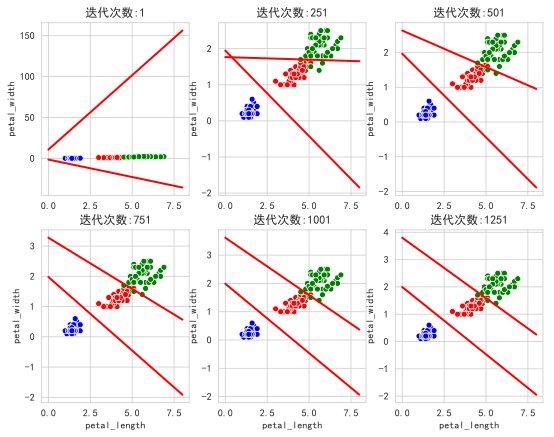

Traceback (most recent call last):
  File "D:\000Program\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "D:\000Program\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "D:\000Program\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1030, in _start
    self.event_source.add_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'add_callback'


In [17]:
# 模型可视化静态描述

fig, axs = plt.subplots(2, 3, figsize=(9,7))
epoch = np.arange(1, len(error_test),round(len(error_test)/6))
for i,epochi in enumerate(epoch):
    sns.scatterplot(x="petal_length", y="petal_width", hue="species",palette=["b", "r","g"],
                data=iris,ax=axs[int(np.floor(i/3)),np.mod(i,3)],legend  = False)
    xi = np.linspace(0, 8, 10) 
    w_plot = w[epochi:epochi+1,:,:]
    axi = i//3
    axj = np.mod(i,3)
    axs[axi,axj].plot(xi, line_yi(w_plot,xi,0), 'r-', linewidth=2)
    axs[axi,axj].plot(xi, line_yi(w_plot,xi,1), 'r-', linewidth=2)
    axs[axi,axj].set_title("迭代次数:{0:}".format(epochi))
    if axi==0:
        axs[axi,axj].set_xlabel("")